<a href="https://colab.research.google.com/github/Daniel-Dumitrescu/text-analysis/blob/main/WordCombos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import string
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
def analyzeBookPairs(book, title):
  wordPairs = createPairs(book)
  wordPairCountD = frequency_dict(wordPairs)
  wordPairCountL = turn_into_list(wordPairCountD)
  wordPairSortedL = merge_sort(wordPairCountL)
  freqs = []
  for i in range(len(wordPairSortedL)):
    freqs.append(wordPairSortedL[i][0])
  consecWords = []
  for i in range(len(wordPairSortedL)):
    consecWords.append(wordPairSortedL[i][1][0]+" "+wordPairSortedL[i][1][1])
  createChart(consecWords, freqs, title)


In [15]:
def analyzeBookIndiv(book, title):
  indivWords = addIndivWords(book)
  wordCountD = frequency_dict(indivWords)
  wordCountL = turn_into_list(wordCountD)
  wordCountSortedL = merge_sort(wordCountL)
  freqs = []
  for i in range(len(wordCountSortedL)):
    freqs.append(wordCountSortedL[i][0])
  consecWords = []
  for i in range(len(wordCountSortedL)):
    consecWords.append(wordCountSortedL[i][1])
  createChart(consecWords, freqs, title)


In [16]:
def compareBooks(books, titles):
  words = ["thou", "hath", "love", "death", "fear", "lord", "father", "fool"]
  freqSets = []
  for i in range(len(books)):
      # each element of freqs is a set containing the frequencies of all the words in a particular book
      freqSets.append({})
      sbook=set(books[i])
      for word in words:
        freqSets[i][word] = 0

      for word in books[i]:
        if (word in words):     
          freqSets[i][word] = freqSets[i][word] + 1
   
  freqLists = []
  for i in range(len(freqSets)):
      freqLists.append([])
      for item in freqSets[i]:
        freqLists[i].append(freqSets[i][item])

  data = []
  for j in range(len(words)):
    data.append([words[j]])
    for i in range(len(books)):
      data[j].append(freqLists[i][j])
  df=pd.DataFrame(data,columns=["Words",'Romeo and Juliet', 'Macbeth', 'Othello', 'King Lear'])
  df.plot(x="Words", y=titles, kind="bar",figsize=(15,4))
  plt.show()


In [17]:
def createPairs(book_raw):
    book=[]
    for word in range(len(book_raw)-1):
        for ch in string.punctuation:
          book_raw[word]=book_raw[word].strip(ch)
        if (len(book_raw[word])>3 and len(book_raw[word+1])>3) and book_raw[word].islower() and book_raw[word+1].islower():    
         book.append((book_raw[word],book_raw[word+1]))
    return book

In [18]:
def addIndivWords(book_raw):
    book=[]
    for word in range(len(book_raw)):
        for ch in string.punctuation:
          book_raw[word]=book_raw[word].strip(ch)
        if (len(book_raw[word])>3 and book_raw[word].islower()):    
         book.append(book_raw[word])
    return book

In [19]:
def frequency_dict(book):
    freq = {}
    sbook=set(book)
    for word_pair in sbook:
        freq[word_pair] = 0

    for word_pair in book:
        freq[word_pair] = freq[word_pair] + 1
    return freq

In [20]:
def turn_into_list(d):
    l=[]
    for item in d:
        l.append((d[item], item))
    return l

In [21]:
def merge_sort(L):
    if len(L) <= 1:
        return L[:]
    middle = len(L)//2
    L1 = merge_sort(L[:middle])
    L2 = merge_sort(L[middle:])

    return merge(L1,L2)

In [22]:
def merge(L1,L2):
    
    newL = []
    i1 = 0
    i2 = 0
    while i1 != len(L1) and i2 != len(L2):
        if L1[i1][0] <= L2[i2][0]:
            newL.append(L1[i1])
            i1 = i1 + 1
        else:
            newL.append(L2[i2])
            i2 = i2 + 1

    newL.extend(L1[i1:])
    newL.extend(L2[i2:])
    return newL 

In [23]:
def createChart(consecWords, freqs, title):
  plt.figure(figsize=(20,10), dpi=80)
  plt.xticks(rotation=90)
  plt.bar(consecWords[len(consecWords)-30:], freqs[len(consecWords)-30:])
  plt.title('Frequency of Word(s) in ' + title)
  plt.xlabel('Word(s)')
  plt.ylabel('Frequency')
  plt.show()


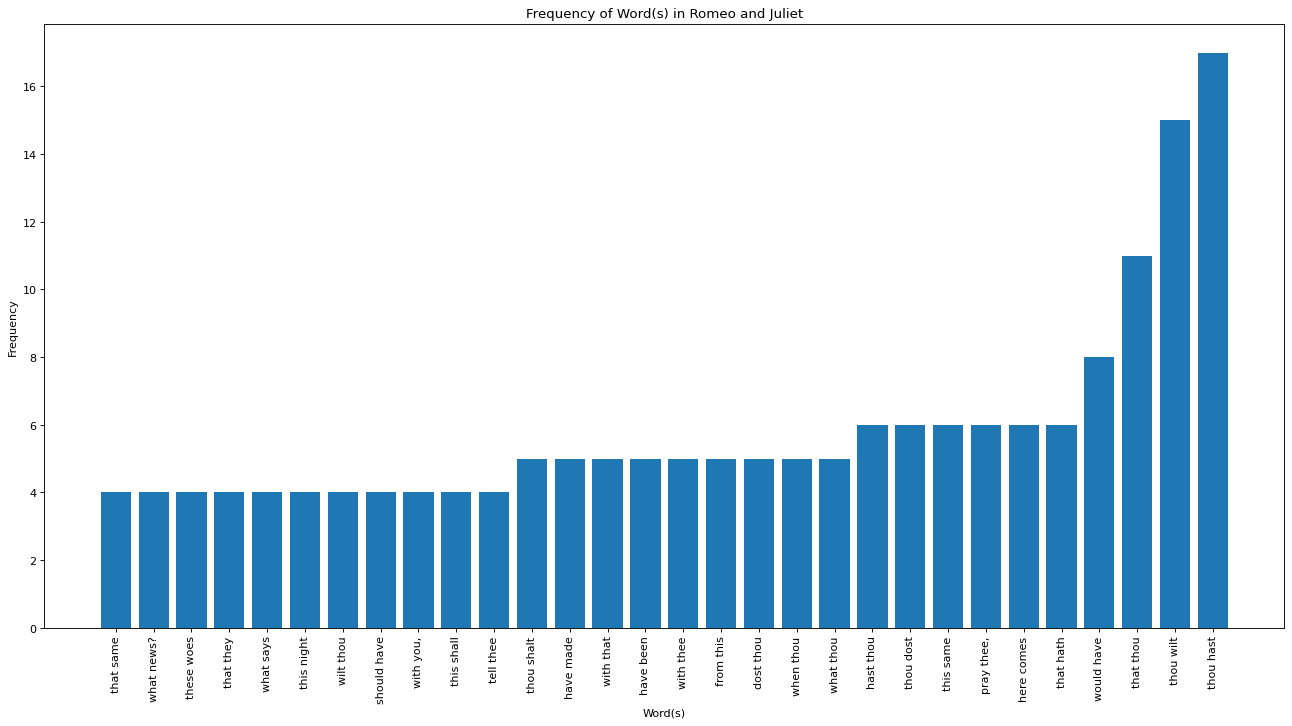

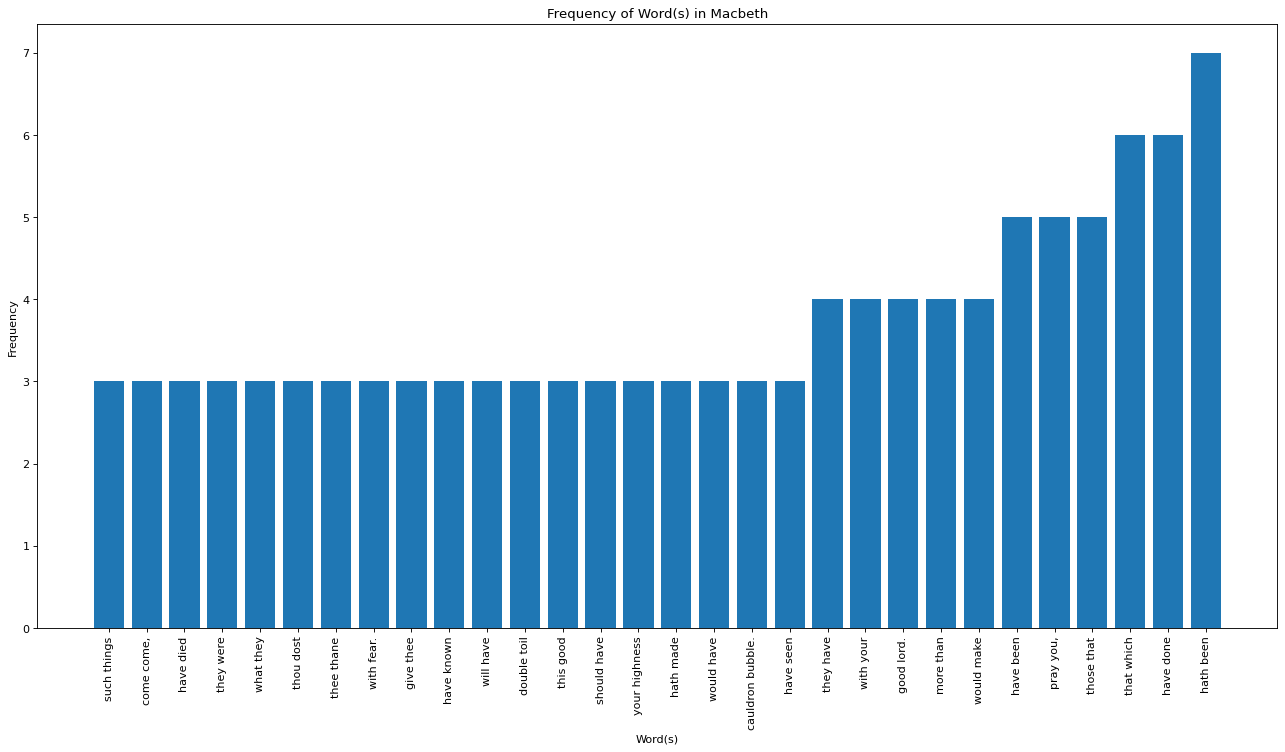

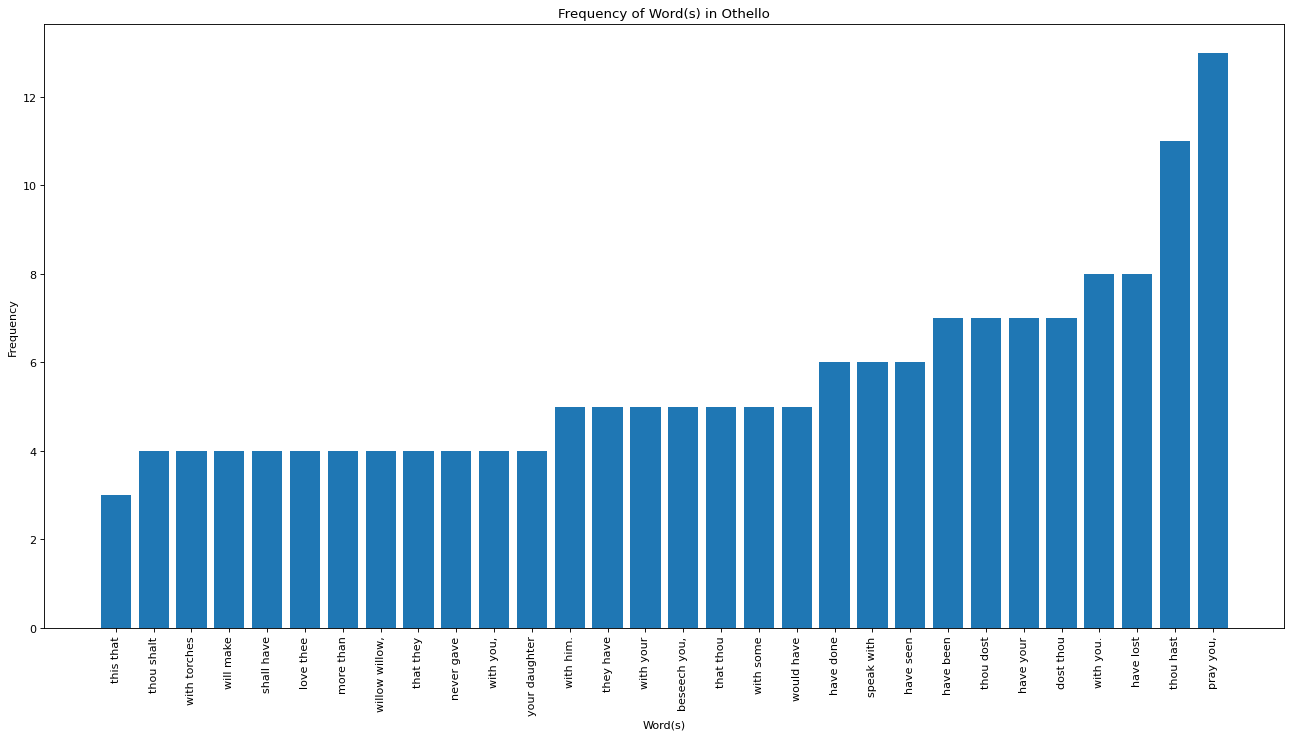

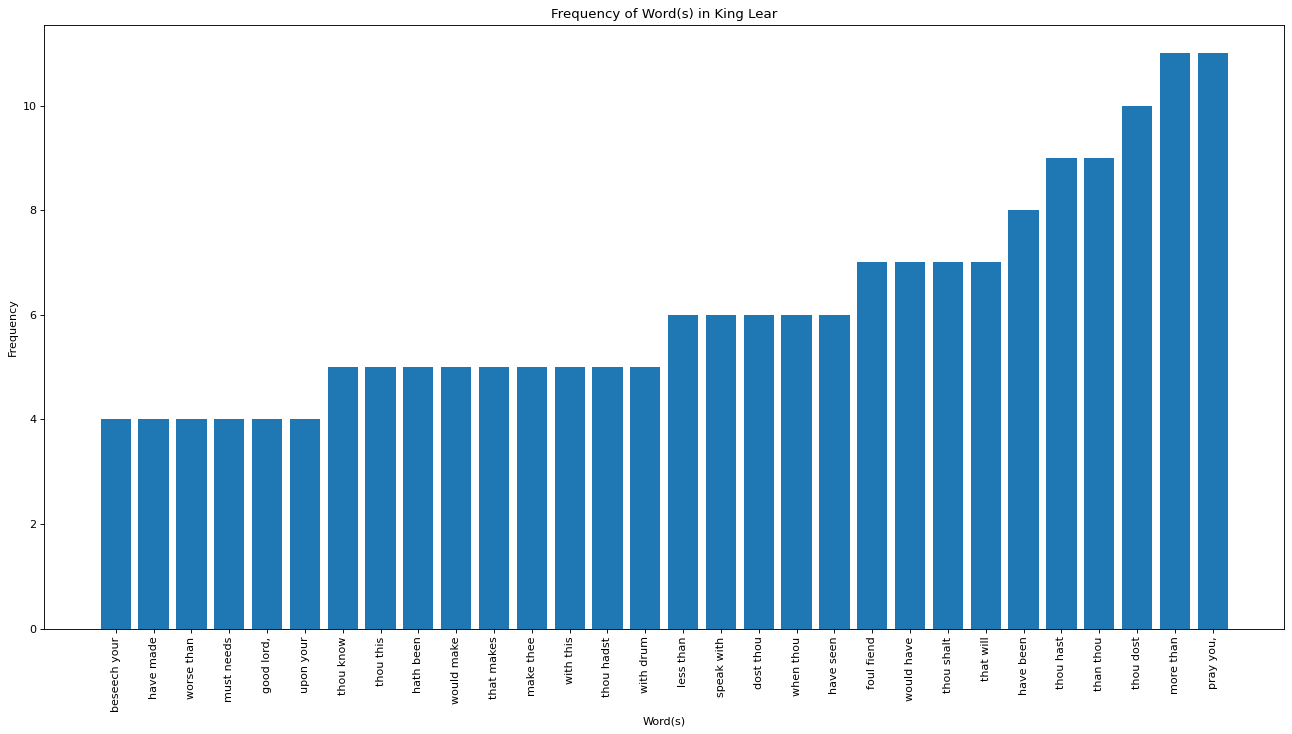

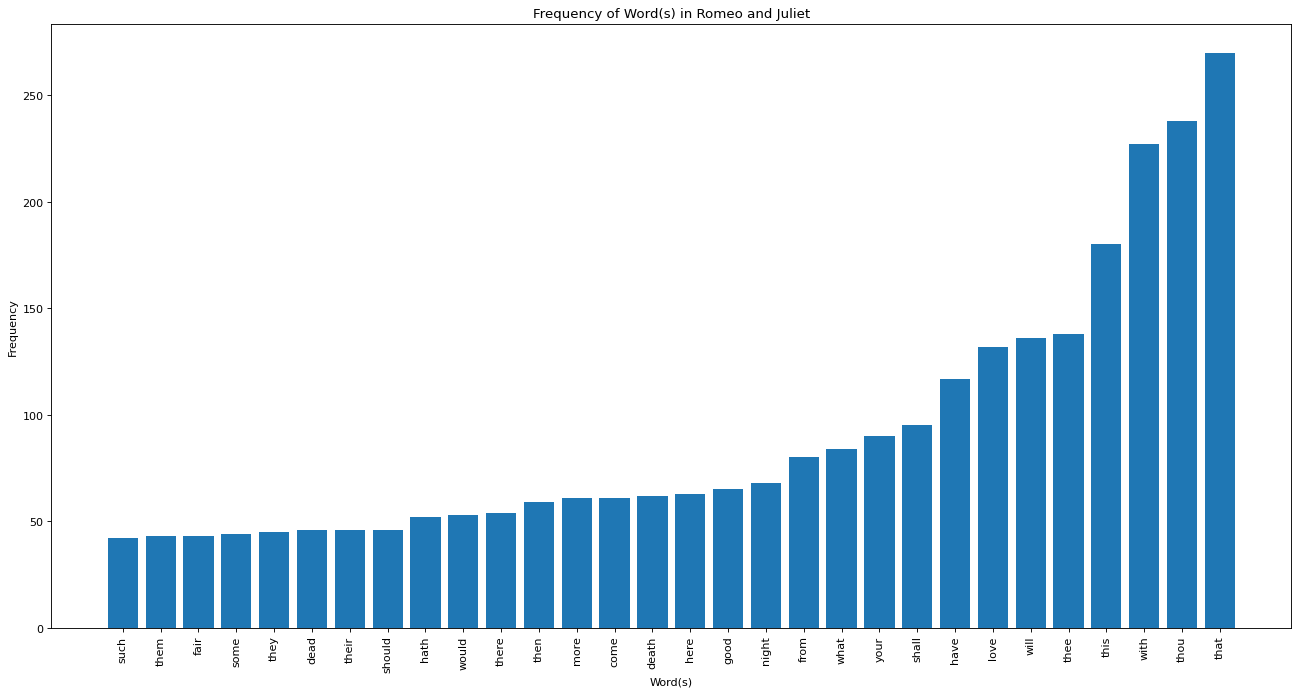

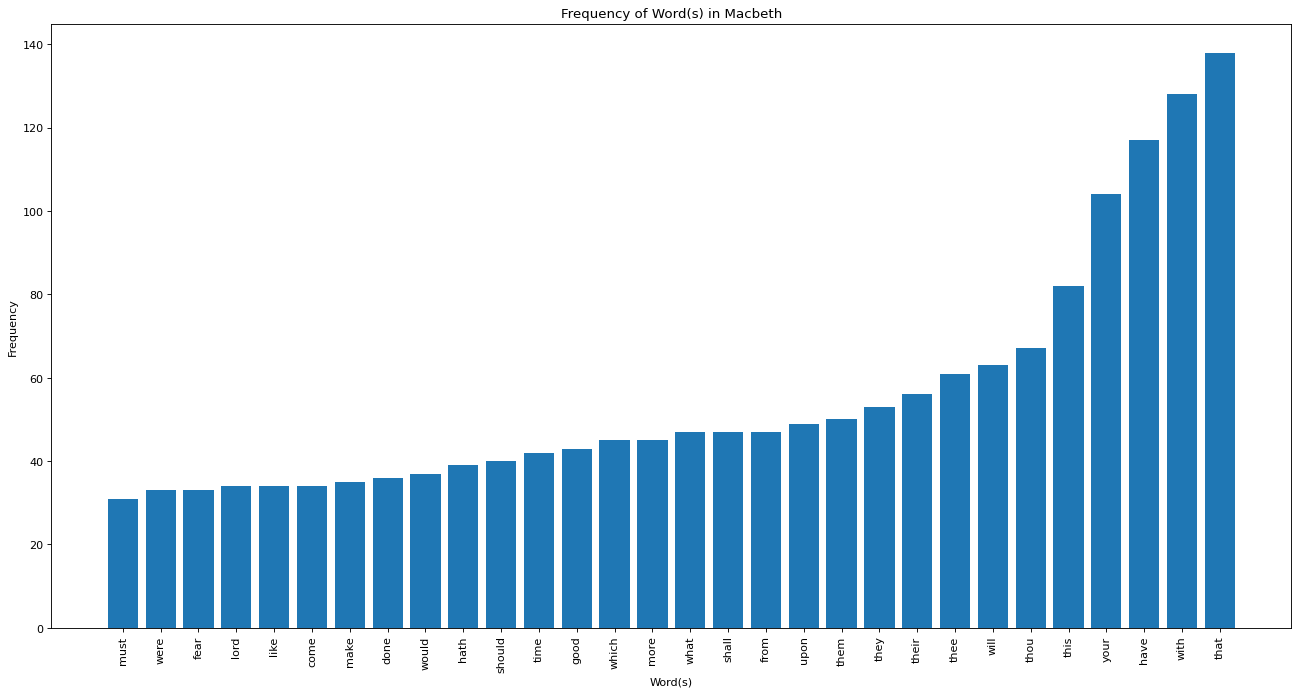

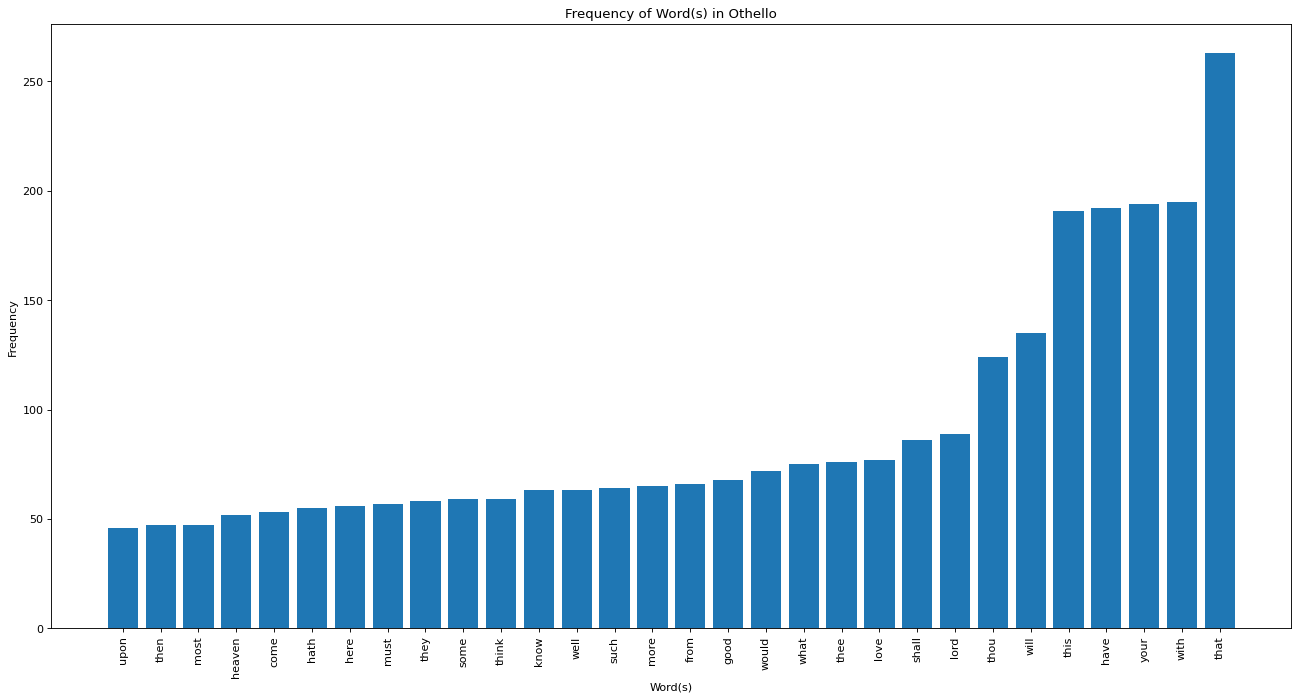

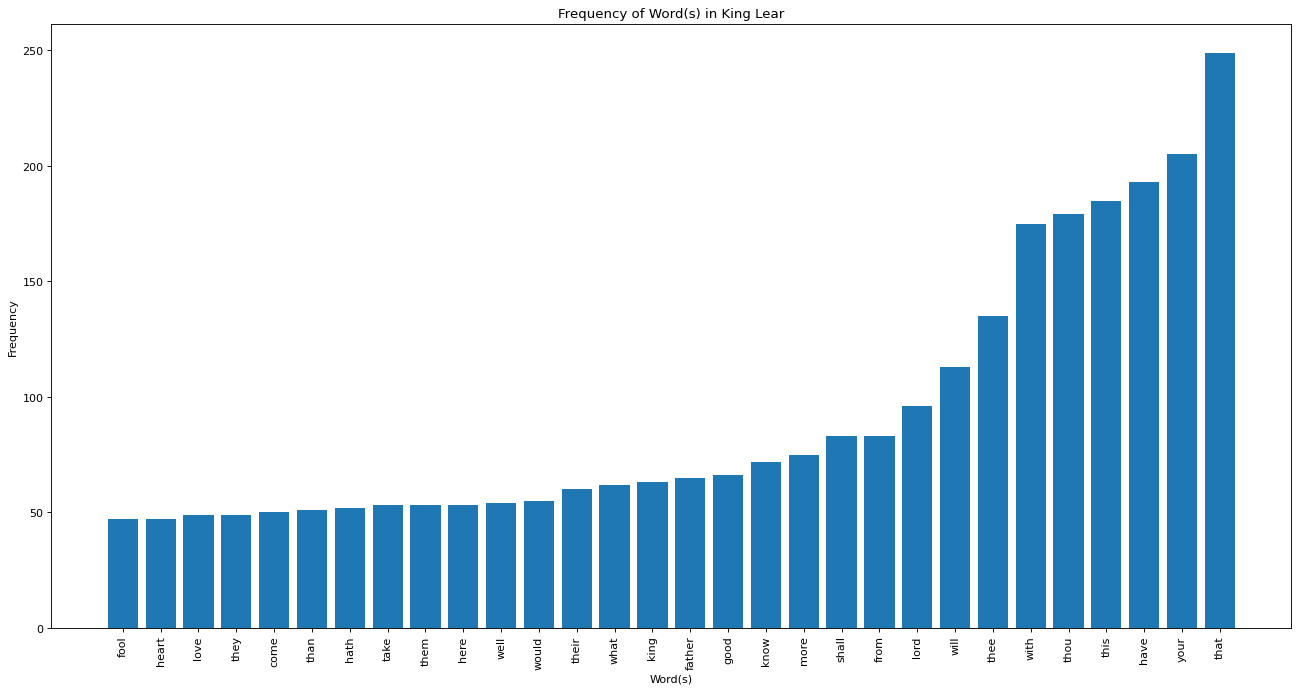

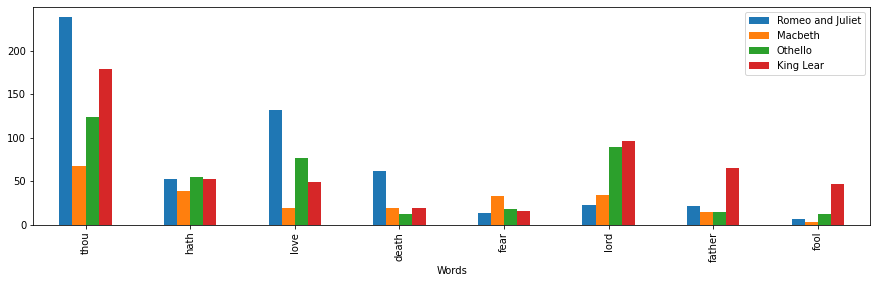

In [24]:
RomeoandJuliet = open('/content/drive/MyDrive/CO-OP Summer 2021/Text Analysis/RomeoandJuliet.txt').read().split()
Macbeth = open('/content/drive/MyDrive/CO-OP Summer 2021/Text Analysis/Macbeth.txt').read().split()
Othello = open('/content/drive/MyDrive/CO-OP Summer 2021/Text Analysis/Othello.txt').read().split()
KingLear = open('/content/drive/MyDrive/CO-OP Summer 2021/Text Analysis/KingLear.txt').read().split()
books = [RomeoandJuliet, Macbeth, Othello, KingLear]
titles = ['Romeo and Juliet', 'Macbeth', 'Othello', 'King Lear']

analyzeBookPairs(RomeoandJuliet, 'Romeo and Juliet')
analyzeBookPairs(Macbeth, 'Macbeth')
analyzeBookPairs(Othello, 'Othello')
analyzeBookPairs(KingLear, 'King Lear')

analyzeBookIndiv(RomeoandJuliet, 'Romeo and Juliet')
analyzeBookIndiv(Macbeth, 'Macbeth')
analyzeBookIndiv(Othello, 'Othello')
analyzeBookIndiv(KingLear, 'King Lear')

compareBooks(books, titles)